# ASSIGNMENT 8

## K-MEANS CLUSTERING

Objective: <br>
Apply K-Means clustering to segment customers based on their purchasing behavior. <br>

Tasks: <br>
Load and preprocess a customer purchasing dataset. <br>
Implement K-Means clustering using scikit-learn. <br>
Visualize the clusters and interpret the results. <br>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv('C:/Users/hp/Downloads/Mall_Customers.csv')
df.head()
#4 features

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()
#There are no Non-Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: >

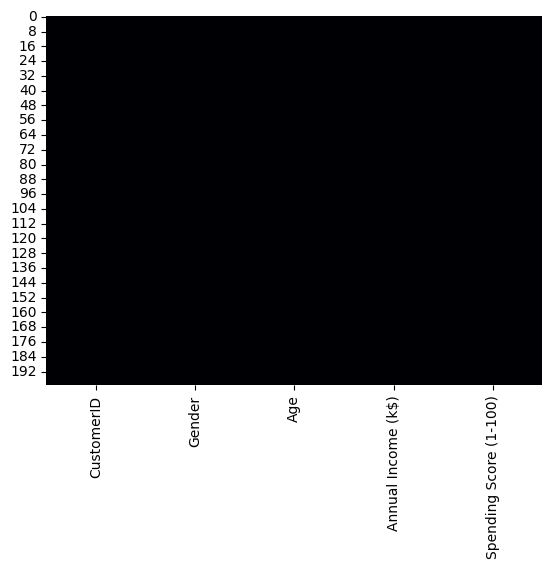

In [9]:
#to check null values in the dataset
sns.heatmap(df.isnull(), cmap='magma', cbar=False)

In [10]:
#mean values from the dataset
df.describe().T[['mean']] 

,mean
CustomerID,100.50
Age,38.85
Annual Income (k$),60.56
Spending Score (1-100),50.20


In [11]:
#Categorical features 
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if(len(df[i].unique())>6):#less than 6 values
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical features: ', *categorical_features)
print('Numerical features: ', *numerical_features)

Categorical features:  Gender
Numerical features:  CustomerID Age Annual Income (k$) Spending Score (1-100)


In [12]:
le = LabelEncoder()
df1 = df.copy(deep=True)

df1['Gender'] = le.fit_transform(df1['Gender'])

print('Label Encoder Transformation')
print(df1['Gender'].unique(), ' = ', le.inverse_transform(df1['Gender'].unique()))

#1 is Male
#0 is Female

Label Encoder Transformation
[1 0]  =  ['Male' 'Female']


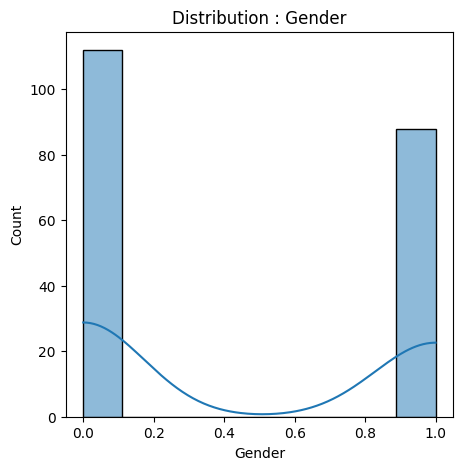

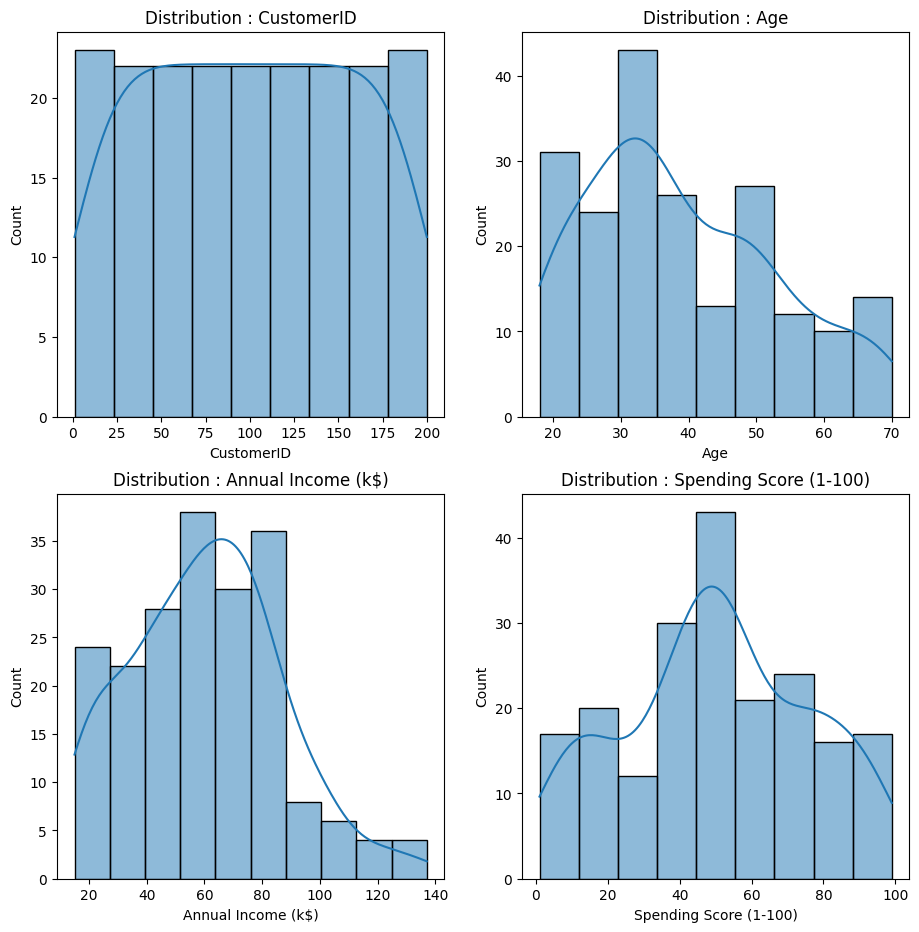

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))

for i in range(len(categorical_features)):
    plt.subplot(1, 1, i+1)
    sns.histplot(data=df1[categorical_features[i]], kde=True)
    title = 'Distribution : '+ categorical_features[i]
    plt.title(title)

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (11,11))
for i in range(len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df1[numerical_features[i]], kde=True)
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [14]:
numerical_features.remove('CustomerID')

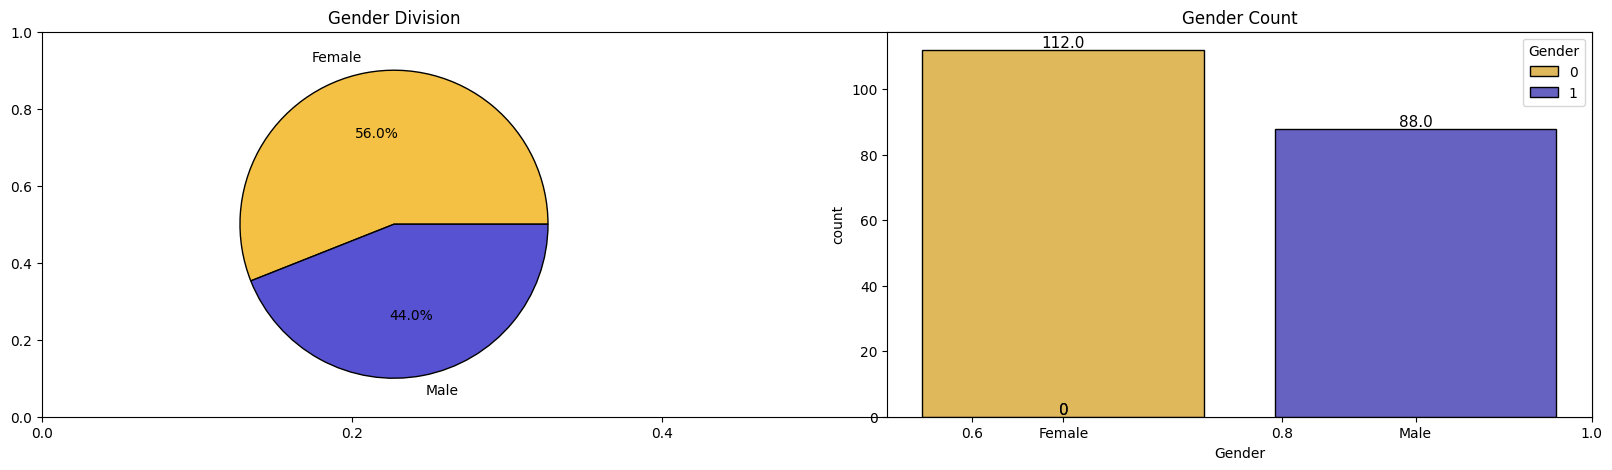

In [15]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(20,5))

l = list(df['Gender'].value_counts())
circle = [l[0]/l[1]*100, l[1]/l[1]*100]
colors = ['#F4C145','#5752D1']
plt.subplot(1,2,1)
plt.pie(circle, labels = ['Female', 'Male'], autopct = '%1.1f%%', colors = colors, wedgeprops = {'edgecolor':'black', 'linewidth':1})
plt.title('Gender Division')


plt.subplot(1,2,2)
ax = sns.countplot(x = 'Gender', data = df1, palette = colors, hue = 'Gender', edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('Gender Count')
ax.set_xticks([0, 1])  
ax.set_xticklabels(['Female', 'Male'])
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9392\3496421193.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])
C:\Users\hp\AppData\Local\Temp\ipykernel_9392\3496421193.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])
C:\Users\hp\AppData\Local\Temp\ipykernel_9392\3496421193.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


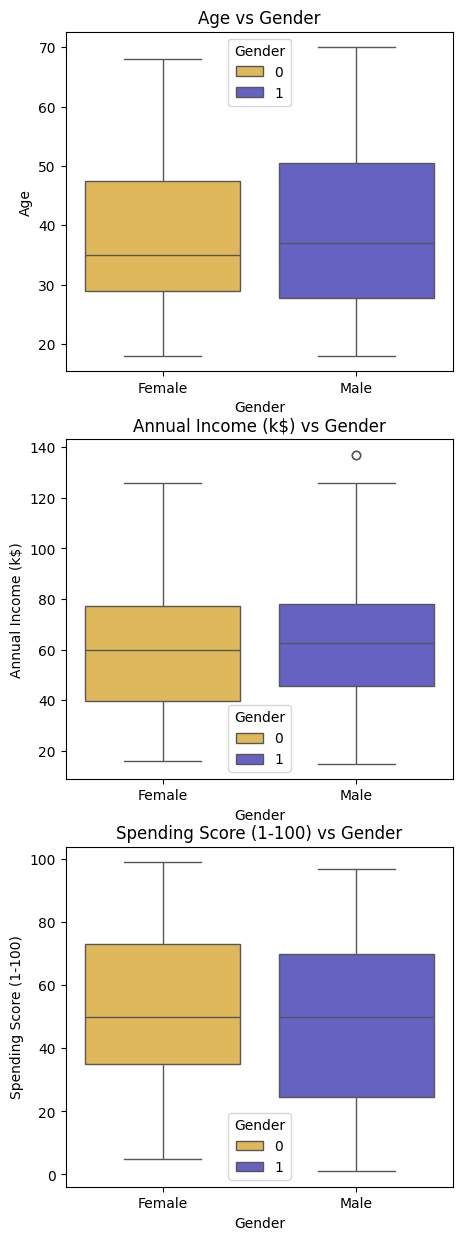

In [16]:
#Numerical vs categorical columns
fig = plt.subplots(nrows = 3, ncols = 1, figsize = (5,15))

for i in range(len(numerical_features)):
    plt.subplot(3,1, (i)+1)
    ax = sns.boxplot(x = 'Gender', y = numerical_features[i], palette = colors, hue = 'Gender', data = df1)
    ax.set_xticklabels(['Female', 'Male'])
    title = numerical_features[i] + ' vs Gender'
    plt.title(title)

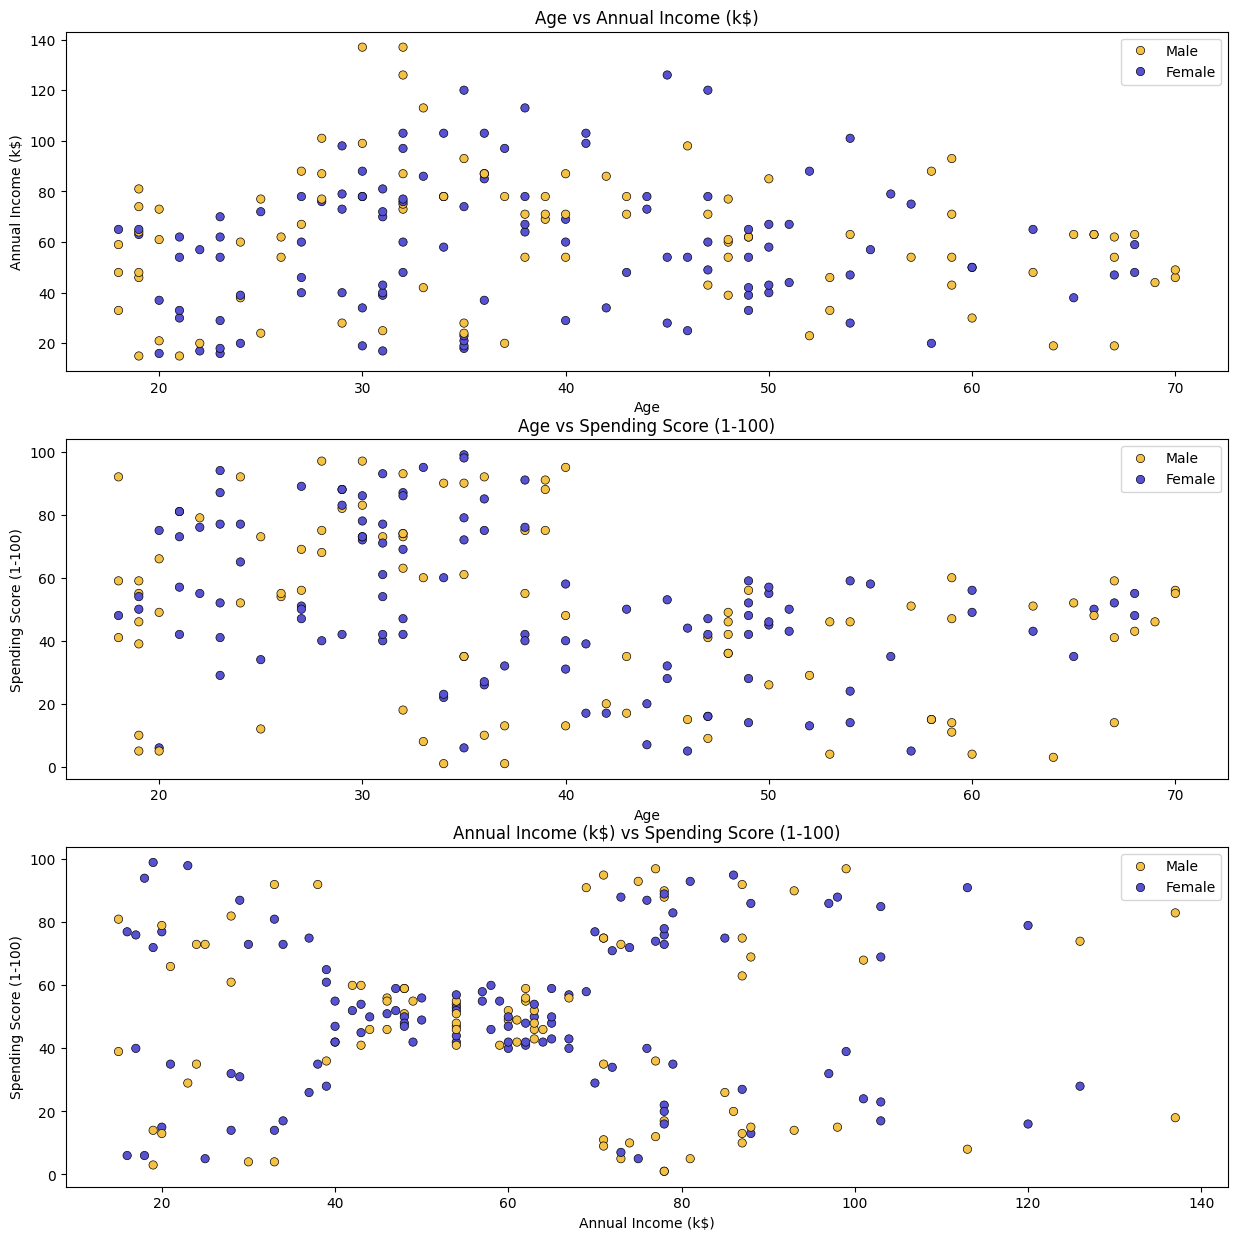

In [17]:
#numerical variable vs numerical variable w.r.t categorical variable. 
a = 0
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(15,15))
for i in range(len(numerical_features)-1):
    for j in range(len(numerical_features)):
        if i!=j & j>i:
            a +=1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i], y = numerical_features[j], data = df, hue = 'Gender', palette = colors, edgecolor = 'black')
            plt.legend(loc = 'upper right',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

### EDA SUMMARY
1. There are more Female customers than Male. 
1. Customers can be divided in 3 groups by Age : 
    1. 20-30
    1. 30-40
    1. 40-70
1. There are 3 groups in the data based on Annual Income :
    1. 0-40k
    2. 40k-70k
    3. 70k-140k
1. There are 3 groups observed in the dataset on the basis of Spending Score :
    1. 0-40
    2. 40-60
    3. 60-100

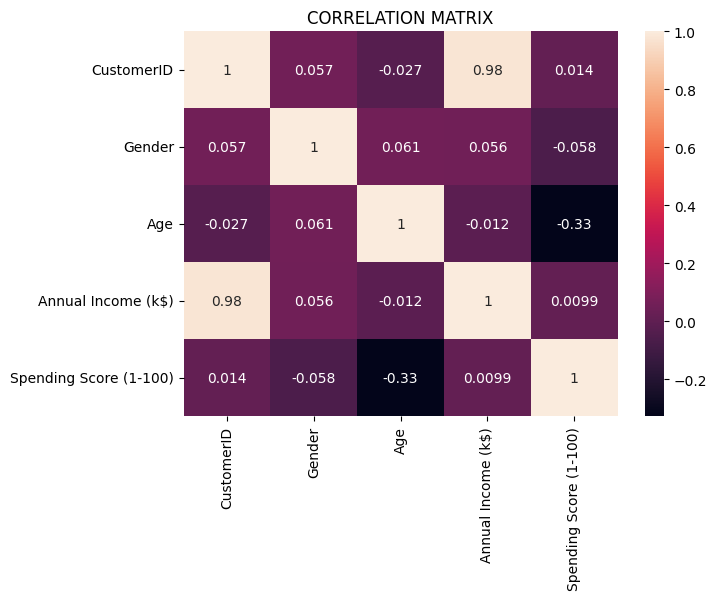

In [18]:
#CORRELATION MATRIX
corr_matrix = df1.corr()
fig, ax = plt.subplots(1,1,figsize = (7,5))
sns.heatmap(corr_matrix, annot = True,cbar = 'True')
plt.title('CORRELATION MATRIX')
plt.show()

In [19]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Label Encoding 
df2 = df1.copy(deep = True)

# Normalization
df2['Age'] = mms.fit_transform(df2[['Age']])
df2['Annual Income (k$)'] = mms.fit_transform(df2[['Annual Income (k$)']])
df2['Spending Score (1-100)'] = mms.fit_transform(df2[['Spending Score (1-100)']])

In [20]:
# Dropping categorical feature 
df1.drop(columns = 'Gender',inplace = True)
df2.drop(columns = 'Gender',inplace = True)

In [30]:
m1 = df1[['Age','Annual Income (k$)', 'Spending Score (1-100)']].values # Original Dataset
m2 = df2[['Age','Annual Income (k$)', 'Spending Score (1-100)']].values # Normalized Dataset

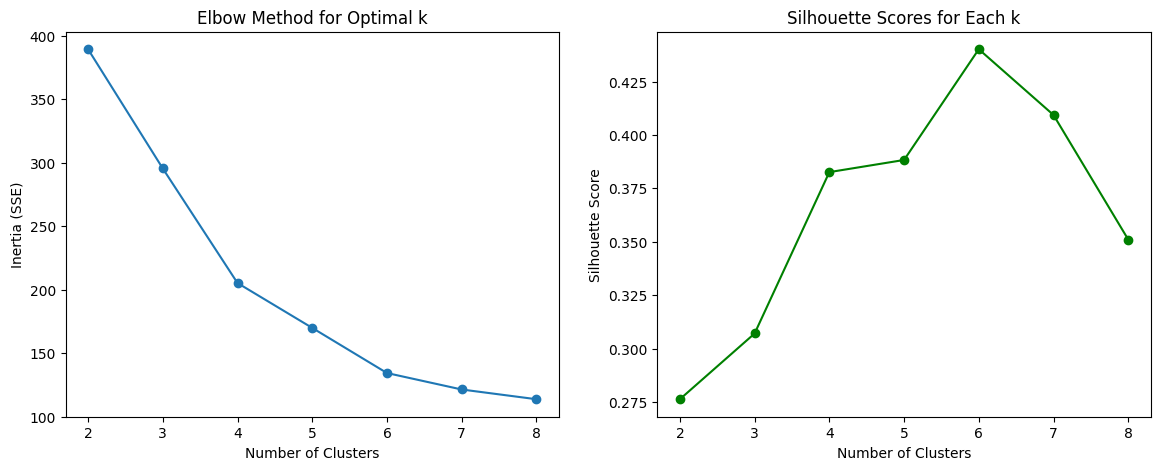

In [31]:
inertia_values_1 = []
silhouette_scores_1 = []

# Loop through cluster numbers from 2 to 8
for k in range(2, 9):
     # Create a pipeline with scaling and KMeans
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardizing the data
        ('kmeans', KMeans(n_clusters=k, random_state=42))  # KMeans clustering
    ])
    # Fit the pipeline on the normalized data (or original data)
    pipeline.fit(m1)  
    
    # Predict the cluster labels
    cluster_labels = pipeline.named_steps['kmeans'].labels_
    
    # Get inertia (SSE) to assess clustering performance
    inertia_values_1.append(pipeline.named_steps['kmeans'].inertia_)
    
    # Calculate silhouette score only if number of clusters is > 1
    silhouette_avg = silhouette_score(m1, cluster_labels)
    silhouette_scores_1.append(silhouette_avg)

# Plot inertia (elbow method) and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Inertia plot
ax1.plot(range(2, 9), inertia_values_1, marker='o')
ax1.set_title('Elbow Method for Optimal k')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia (SSE)')

# Silhouette score plot
ax2.plot(range(2, 9), silhouette_scores_1, marker='o', color='green')
ax2.set_title('Silhouette Scores for Each k')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')

plt.show()

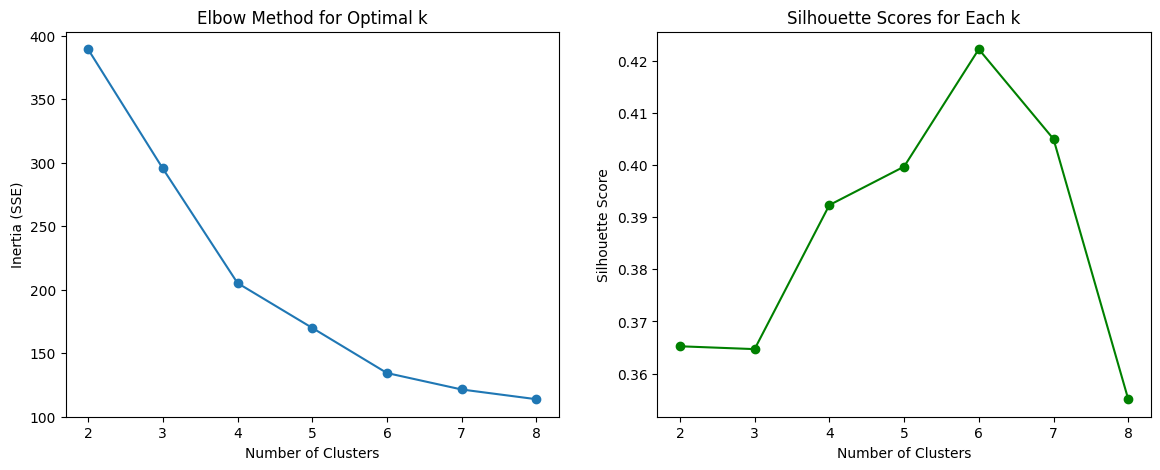

In [27]:
inertia_values_2 = []
silhouette_scores_2 = []

# Loop through cluster numbers from 2 to 8
for k in range(2, 9):
     # Create a pipeline with scaling and KMeans
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardizing the data
        ('kmeans', KMeans(n_clusters=k, random_state=42))  # KMeans clustering
    ])
    
    pipeline.fit(m2)  
    
    # Predict the cluster labels
    cluster_labels = pipeline.named_steps['kmeans'].labels_
    
    # Get inertia (SSE) to assess clustering performance
    inertia_values_2.append(pipeline.named_steps['kmeans'].inertia_)
    
    # Calculate silhouette score only if number of clusters is > 1
    silhouette_avg = silhouette_score(m2, cluster_labels)
    silhouette_scores_2.append(silhouette_avg)

# Plot inertia (elbow method) and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Inertia plot
ax1.plot(range(2, 9), inertia_values_2, marker='o')
ax1.set_title('Elbow Method for Optimal k')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia (SSE)')

# Silhouette score plot
ax2.plot(range(2, 9), silhouette_scores_2, marker='o', color='green')
ax2.set_title('Silhouette Scores for Each k')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')

plt.show()

FOR THE OPTIMAL RESULT THE NO. OF CLUSTERS SHOULD BE 6 FOR BOTH THE ORIGINAL AND THE NORMALIZED DATASET WHERE WE HAVE CONSIDERED THE THREE NUMRICAL FEATURES. 

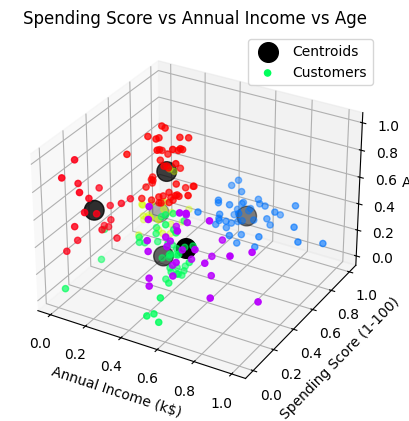

In [44]:
# Ensure m2 contains the 3 features: Age, Annual Income, and Spending Score
# m2 = df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Fit KMeans with 6 clusters on 3D data
model = KMeans(n_clusters=6, max_iter=1000)
model.fit(m2)

# Extract cluster centers and labels
centroids = model.cluster_centers_  # Now it will be 3D
labels = model.labels_

# Extract features for plotting
x = np.array(df2['Annual Income (k$)'])
y = np.array(df2['Spending Score (1-100)'])
z = np.array(df2['Age'])

# Plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot cluster centroids
ax.scatter(centroids[:, 1], centroids[:, 2], centroids[:, 0], marker="o", color='black', s=200, label='Centroids')

# Plot data points
ax.scatter(x, y, z, c=labels, cmap='hsv', label='Customers')

# Labels and title
plt.title('Spending Score vs Annual Income vs Age')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.legend()

plt.show()
